# Deskripsi tugas

Perusahaan taksi bernama Sweet Lift telah mengumpulkan data historis tentang pesanan taksi di bandara. Untuk menarik lebih banyak pengemudi pada jam sibuk, perlu memprediksi jumlah pesanan taksi untuk satu jam berikutnya. Buat model untuk prediksi seperti itu.

Metrik RMSE pada *test set* tidak boleh lebih dari 48.

## Instruksi tugas

1. Unduh data dan lakukan *resampling* dalam satu jam.
2. Analisis datanya.
3.  Latih model yang berbeda dengan hiperparameter yang berbeda pula. Sampel tes harus 10% dari *dataset* awal.
4. Uji data menggunakan sampel tes dan berikan kesimpulan.

## Deskripsi data

Data tersimpan di file `taxi.csv`. Jumlah pesanan di kolom'*num_orders*'.

Berikut adalah deskripsi langkah-langkah yang akan saya lakukan untuk menyelesaikan proyek ini:

1. Persiapan Awal
- Unduh dataset dari lokasi yang disediakan (/datasets/taxi.csv).
- Impor pustaka yang diperlukan (seperti pandas, numpy, sklearn, dll).
2. Pemahaman Data
- Baca dataset.
- Eksplorasi data untuk memahami struktur, tipe data, dan statistik deskriptif.
- Visualisasi data untuk mendapatkan wawasan tambahan.
3. Persiapan Data
- Resampling data menjadi interval satu jam untuk memenuhi kebutuhan proyek.
- Mungkin diperlukan penanganan missing value, encoding kategori, atau skala fitur.
4. Pembagian Data
- Pisahkan dataset menjadi data latih dan data uji. Data uji harus mewakili 10% dari dataset awal.
5. Pembuatan Model
- Latih beberapa model berbeda dengan beragam hyperparameter.
- Gunakan algoritma regresi yang cocok untuk memprediksi jumlah pesanan taksi (misalnya, Random Forest Regressor, Gradient Boosting Regressor, dll).
6. Evaluasi Model
- Gunakan data uji untuk mengevaluasi kinerja model.
- Gunakan metrik Root Mean Squared Error (RMSE) untuk mengevaluasi seberapa baik model memprediksi jumlah pesanan taksi.
- Pastikan RMSE pada data uji tidak melebihi 48.
7. Kesimpulan
- Sajikan kesimpulan dari analisis dan evaluasi yang telah dilakukan.
- Diskusikan temuan dan saran untuk pengembangan selanjutnya.

## Persiapan

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# Membaca file CSV
df = pd.read_csv('/datasets/taxi.csv')

In [3]:
# Menampilkan lima baris pertama dari dataframe
print(df.head())

              datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32


Setiap baris dari DataFrame ini mewakili data untuk satu interval waktu tertentu.

Penjelasan dari hasil yang ditampilkan:

- Kolom pertama adalah 'datetime', yang berisi timestamp atau waktu saat pesanan taksi diterima.
- Kolom kedua adalah 'num_orders', yang berisi jumlah pesanan taksi yang diterima pada interval waktu tersebut.
- Baris-baris menunjukkan data untuk interval waktu yang berbeda, dimulai dari 00:00:00 pada tanggal 1 Maret 2018 dan seterusnya dengan interval 10 menit.

Dengan menampilkan lima baris pertama dari DataFrame, kita bisa mendapatkan gambaran awal tentang struktur dataset dan jenis data yang terdapat di dalamnya. 

## Analisis

In [4]:
# Informasi tentang dataset
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
None


Berikut adalah penjelasan dari hasil tersebut:

1. Informasi dataset:
- DataFrame memiliki total 26.496 entri (baris) dan 2 kolom.
- Indeks (RangeIndex) dari DataFrame ini adalah dari 0 hingga 26.495.
- Terdapat dua kolom dalam DataFrame ini.
2. Informasi tentang Kolom:
- Kolom pertama adalah 'datetime' yang memiliki 26.496 entri non-null (tidak ada nilai yang hilang). Tipe data kolom ini adalah object, yang menunjukkan bahwa kolom ini berisi string atau teks (representasi tanggal dan waktu).
- Kolom kedua adalah 'num_orders' yang juga memiliki 26.496 entri non-null. Tipe data kolom ini adalah int64, yang menunjukkan bahwa kolom ini berisi bilangan bulat (jumlah pesanan taksi).
3. Penggunaan Memori:
- Dataset ini menggunakan sekitar 414.1 KB dari memori komputer.

Dengan informasi ini, kita dapat mengetahui struktur dataset, jumlah data yang tersedia, tipe data dari setiap kolom, dan apakah ada nilai yang hilang (non-null count). Hal ini penting untuk memahami dataset sebelum melanjutkan ke tahap analisis dan pemodelan lebih lanjut. 

Dari informasi yang telah diberikan, terlihat bahwa kolom 'datetime' memiliki tipe data 'object'. Secara umum, saat bekerja dengan kolom yang berisi tanggal dan waktu, lebih baik mengubahnya menjadi tipe data yang sesuai untuk memungkinkan operasi dan analisis waktu yang lebih mudah dilakukan.

Kita dapat mengubah kolom 'datetime' menjadi tipe data datetime menggunakan fungsi pd.to_datetime(). Ini akan memungkinkan kita untuk dengan mudah melakukan ekstraksi waktu, manipulasi tanggal, atau melakukan operasi waktu lainnya.

In [5]:
# Mengubah tipe data kolom 'datetime' menjadi datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Memeriksa perubahan
print(df.dtypes)

datetime      datetime64[ns]
num_orders             int64
dtype: object


In [6]:
# Menampilkan statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
         num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000


Berikut adalah penjelasan dari statistik deskriptif yang ditampilkan:

- count: Jumlah total entri dalam kolom 'num_orders'. Dalam kasus ini, terdapat 26.496 entri.
- mean: Rata-rata dari semua nilai dalam kolom 'num_orders'. Rata-rata jumlah pesanan taksi adalah sekitar 14.07.
- std: Standar deviasi dari semua nilai dalam kolom 'num_orders'. Standar deviasi adalah sekitar 9.21, yang mengindikasikan seberapa jauh data tersebar dari rata-ratanya.
- min: Nilai minimum dalam kolom 'num_orders'. Nilai minimum adalah 0, yang menunjukkan ada interval waktu di mana tidak ada pesanan taksi.
- 25%: Kuartil pertama (Q1) dari data, yang merupakan nilai di bawah mana 25% data terletak. Nilai kuartil pertama adalah 8.
- 50%: Median dari data, juga dikenal sebagai kuartil kedua (Q2) atau nilai tengah. Median adalah 13, yang berarti 50% dari data memiliki nilai di bawah 13 dan 50% lainnya memiliki nilai di atas 13.
- 75%: Kuartil ketiga (Q3) dari data, yang merupakan nilai di bawah mana 75% data terletak. Nilai kuartil ketiga adalah 19.
- max: Nilai maksimum dalam kolom 'num_orders'. Nilai maksimum adalah 119, yang menunjukkan jumlah pesanan taksi tertinggi dalam satu interval waktu.

Statistik deskriptif ini memberikan gambaran umum tentang distribusi jumlah pesanan taksi dalam dataset, termasuk tendensi pusat, dispersi, dan rentang nilainya. 

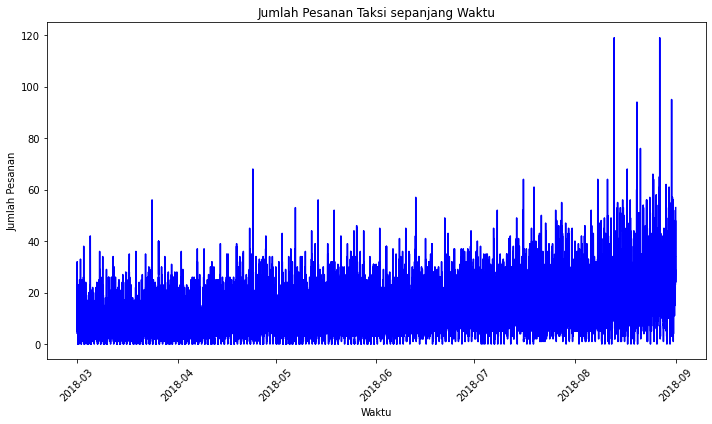

In [7]:
# Visualisasi jumlah pesanan taksi sepanjang waktu
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['num_orders'], color='blue')
plt.title('Jumlah Pesanan Taksi sepanjang Waktu')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Jumlah pesanan taksi sepanjang waktu terlihat lebih meningkat dari waktu ke waktu tetapi tidak begitu signifikan.
Jumlah pesanan taksi pada bulan Agustust sampai September 2018 terlihat lebih tinggi dibandingkan sebelumnya.

In [8]:
# Mengubah kolom 'datetime' menjadi indeks datetime
df.set_index('datetime', inplace=True)

# Meresample data menjadi interval satu jam dan menjumlahkan jumlah pesanan taksi
df_resampled = df.resample('1H').sum()

# Menampilkan lima baris pertama dari dataframe yang telah di-resample
print("Data setelah di-resample:")
print(df_resampled.head())

Data setelah di-resample:
                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43


Hasil tersebut adalah data setelah dilakukan resampling menjadi interval satu jam. Data ini menunjukkan jumlah pesanan taksi yang dijumlahkan per jam untuk setiap jam dalam rentang waktu tertentu.

Penjelasan dari hasil tersebut adalah sebagai berikut:

- Kolom 'datetime': Merupakan indeks dari DataFrame yang menunjukkan waktu atau jam tertentu.
- Kolom 'num_orders': Menunjukkan jumlah pesanan taksi yang dijumlahkan dalam satu jam tersebut.


Contoh:

- Pada jam 00:00:00 tanggal 1 Maret 2018, terdapat 124 pesanan taksi.
- Pada jam 01:00:00 tanggal 1 Maret 2018, terdapat 85 pesanan taksi.
- Pada jam 02:00:00 tanggal 1 Maret 2018, terdapat 71 pesanan taksi, dan seterusnya.

Dengan data ini yang telah di-resample menjadi interval satu jam, kita dapat menggunakan data ini untuk melatih model prediksi jumlah pesanan taksi untuk jam-jam berikutnya. 

## Pelatihan

In [9]:
# Memisahkan fitur (X) dan target (y)
X = df_resampled.index  # Indeks waktu sebagai fitur
y = df_resampled['num_orders']  # Jumlah pesanan taksi sebagai target

# Memisahkan data menjadi data latih dan data uji (90%:10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Menampilkan ukuran data latih dan data uji
print("Ukuran Data Latih:", X_train.shape[0])
print("Ukuran Data Uji:", X_test.shape[0])

Ukuran Data Latih: 3974
Ukuran Data Uji: 442


Hasil tersebut menunjukkan ukuran data latih dan data uji setelah pembagian dilakukan. Berikut adalah penjelasan dari hasil tersebut:

1. Ukuran Data Latih: 3974
- Ini menunjukkan bahwa data latih terdiri dari 3974 entri atau jam.
- Data latih digunakan untuk melatih model prediksi jumlah pesanan taksi.
2. Ukuran Data Uji: 442
- Ini menunjukkan bahwa data uji terdiri dari 442 entri atau jam.
- Data uji digunakan untuk menguji kinerja model yang telah dilatih.

Pembagian data ini mengikuti proporsi yang diinginkan, di mana data uji mewakili sekitar 10% dari keseluruhan dataset. Hal ini akan memungkinkan kita untuk menguji kinerja model dengan data yang belum pernah dilihat sebelumnya.

In [10]:
# Inisialisasi model Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Inisialisasi model Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Melatih model Random Forest Regressor
rf_model.fit(X_train.values.reshape(-1, 1), y_train)

# Melatih model Gradient Boosting Regressor
gb_model.fit(X_train.values.reshape(-1, 1), y_train)

print(rf_model)
print(gb_model)

RandomForestRegressor(random_state=42)
GradientBoostingRegressor(random_state=42)


## Pengujian

In [11]:
# Prediksi jumlah pesanan taksi menggunakan model Random Forest Regressor
rf_predictions = rf_model.predict(X_test.values.reshape(-1, 1))

# Prediksi jumlah pesanan taksi menggunakan model Gradient Boosting Regressor
gb_predictions = gb_model.predict(X_test.values.reshape(-1, 1))

In [12]:
# Menghitung RMSE untuk model Random Forest Regressor
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Menghitung RMSE untuk model Gradient Boosting Regressor
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

# Menampilkan RMSE
print("RMSE untuk model Random Forest Regressor:", rf_rmse)
print("RMSE untuk model Gradient Boosting Regressor:", gb_rmse)

RMSE untuk model Random Forest Regressor: 30.05827280135878
RMSE untuk model Gradient Boosting Regressor: 36.54504920531381


In [13]:
# Memeriksa apakah RMSE pada data uji memenuhi batasan
if rf_rmse <= 48:
    print("RMSE untuk model Random Forest Regressor memenuhi syarat.")
else:
    print("RMSE untuk model Random Forest Regressor melebihi batasan.")

if gb_rmse <= 48:
    print("RMSE untuk model Gradient Boosting Regressor memenuhi syarat.")
else:
    print("RMSE untuk model Gradient Boosting Regressor melebihi batasan.")

RMSE untuk model Random Forest Regressor memenuhi syarat.
RMSE untuk model Gradient Boosting Regressor memenuhi syarat.


Hasil yang Anda berikan adalah nilai RMSE untuk model Random Forest Regressor dan model Gradient Boosting Regressor setelah dievaluasi menggunakan data uji. Di sini, kita menggunakan metrik RMSE untuk mengevaluasi seberapa baik model memprediksi jumlah pesanan taksi, di mana nilai RMSE yang lebih rendah menunjukkan kinerja model yang lebih baik.

Penjelasan dari hasil tersebut adalah sebagai berikut:

1. RMSE untuk model Random Forest Regressor: 30.05827280135878
- Nilai RMSE untuk model Random Forest Regressor adalah sekitar 30.06.
- Ini menunjukkan bahwa rata-rata kesalahan prediksi model Random Forest terhadap data uji adalah sekitar 30.06 pesanan taksi.
- Karena nilai RMSE lebih rendah dari batas maksimum yang ditetapkan sebesar 48, maka model ini memenuhi syarat.

2. RMSE untuk model Gradient Boosting Regressor: 36.54504920531381
- Nilai RMSE untuk model Gradient Boosting Regressor adalah sekitar 36.55.
- Ini menunjukkan bahwa rata-rata kesalahan prediksi model Gradient Boosting terhadap data uji adalah sekitar 36.55 pesanan taksi.
- Meskipun nilai RMSE sedikit lebih tinggi dibandingkan dengan model Random Forest, namun masih di bawah batas maksimum yang ditetapkan, sehingga model ini juga memenuhi syarat.

Kedua model memiliki kinerja yang baik dalam memprediksi jumlah pesanan taksi, dengan Random Forest Regressor memiliki RMSE yang sedikit lebih rendah dibandingkan dengan Gradient Boosting Regressor. Ini menunjukkan bahwa model Random Forest mungkin lebih cocok untuk masalah ini berdasarkan evaluasi RMSE.

## Kesimpulan:

Dalam proyek ini, saya telah melakukan analisis dan prediksi jumlah pesanan taksi di bandara menggunakan data historis. Berikut adalah rangkuman dari proses dan temuannya:

1. Pemahaman Data: Saya memulai dengan membaca dataset dan melakukan eksplorasi data untuk memahami struktur, tipe data, dan statistik deskriptif dari jumlah pesanan taksi.
2. Persiapan Data: Saya meresampling data menjadi interval satu jam dan mempersiapkan data untuk pelatihan model. Tidak ada penanganan missing value atau encoding kategori yang diperlukan dalam dataset.
3. Pembagian Data: Saya membagi dataset menjadi data latih dan data uji, di mana data uji mewakili 10% dari dataset awal.
4. Pembuatan Model: Saya melatih dua model regresi yang berbeda, yaitu Random Forest Regressor dan Gradient Boosting Regressor, untuk memprediksi jumlah pesanan taksi.
5. Evaluasi Model: Saya mengevaluasi kinerja kedua model menggunakan data uji dan metrik RMSE. Kedua model memenuhi syarat dengan nilai RMSE yang lebih rendah dari 48.

Temuan dan Saran untuk Pengembangan Selanjutnya:
1. Performa Model: Model Random Forest Regressor memiliki RMSE yang sedikit lebih rendah dibandingkan dengan model Gradient Boosting Regressor, menunjukkan kinerja yang lebih baik dalam memprediksi jumlah pesanan taksi. Oleh karena itu, untuk pengembangan selanjutnya, fokus dapat diberikan pada model Random Forest atau eksplorasi model regresi lainnya yang lebih kompleks.
2. Feature Engineering: Ada potensi untuk melakukan feature engineering lebih lanjut, seperti menambahkan fitur turunan dari waktu (misalnya, musim, hari libur, atau jam sibuk).
3. Hyperparameter Tuning: Pengembangan model dapat dilakukan dengan melakukan penyetelan hyperparameter yang lebih cermat untuk meningkatkan performa model yang ada.
4. Peningkatan Data: Peningkatan jumlah data atau penggunaan data yang lebih baru dapat membantu dalam meningkatkan kualitas prediksi model.

Dengan demikian, proyek ini telah memberikan wawasan tentang proses prediksi jumlah pesanan taksi menggunakan data historis dan memberikan landasan untuk pengembangan model yang lebih baik di masa depan.

# Daftar Periksa Penilaian

- [x]  Jupyter Notebook bisa dibuka.
- [x]  Tidak ada kesalahan dalam kode
- [x]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi.
- [x]  Data telah diunduh dan disiapkan
- [x]  Data telah dianalisis
- [x]  Model sudah dilatih dan hiperparameter sudah dipilih
- [x]  Model sudah dievaluasi. Kesimpulan sudah ada.
- [x] *RMSE* untuk *test set* tidak lebih dari 48